In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.info()

In [ ]:

df.columns


In [ ]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
Y = df['survived']

In [ ]:
sns.boxenplot(data=Y)

In [58]:
X= pd.get_dummies(X ,columns=['sex'])

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"

In [ ]:
X['age'].fillna(value=X['age'].mean(), inplace =True)

In [ ]:
X.isnull().sum()

In [ ]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=X[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

In [ ]:
Q1 =X['age'].quantile(0.25)
Q3= X['age'].quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

X = X[(df['age']>lower_bound ) & (df['age'] <upper_bound)]

In [ ]:
sns.boxplot(data=Y,y='survived')

In [ ]:
X

In [ ]:
sns.boxplot(data=Y,y=['serv'])

In [ ]:
Q1 =Y.quantile(0.25)
Q3= Y.quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

Y = Y[(Y>lower_bound ) & (Y <upper_bound)]

In [ ]:
Y

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier

In [72]:
model = DecisionTreeClassifier()

In [73]:
X_train, X_test ,y_train,y_test = train_test_split(X,Y,test_size=(0.2))

In [74]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
prediction = model.predict(X_test)
expected = y_test

In [64]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

<Axes: ylabel='survived'>

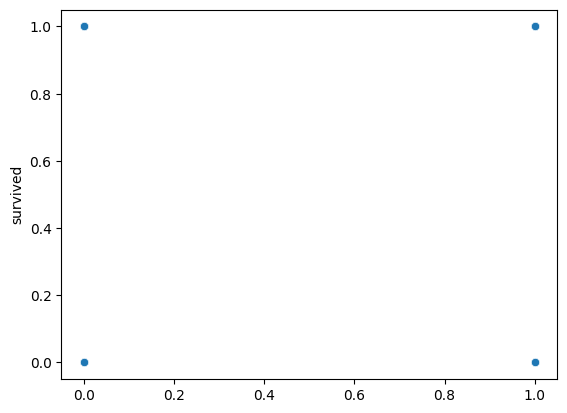

In [65]:
sns.scatterplot(x=prediction,y=expected)

In [68]:
from sklearn.metrics import accuracy_score
print('Accuracy :' , accuracy_score(prediction,expected))

Accuracy : 0.8100558659217877


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction )
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
r2 = r2_score(y_test, prediction)

print("MAE", mae)
print("MSE",mse)
print("RMSE",rmse)
print("R^2",r2)

MAE 0.18994413407821228
MSE 0.18994413407821228
RMSE 0.43582580703557733
R^2 0.17309782608695634


c:\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


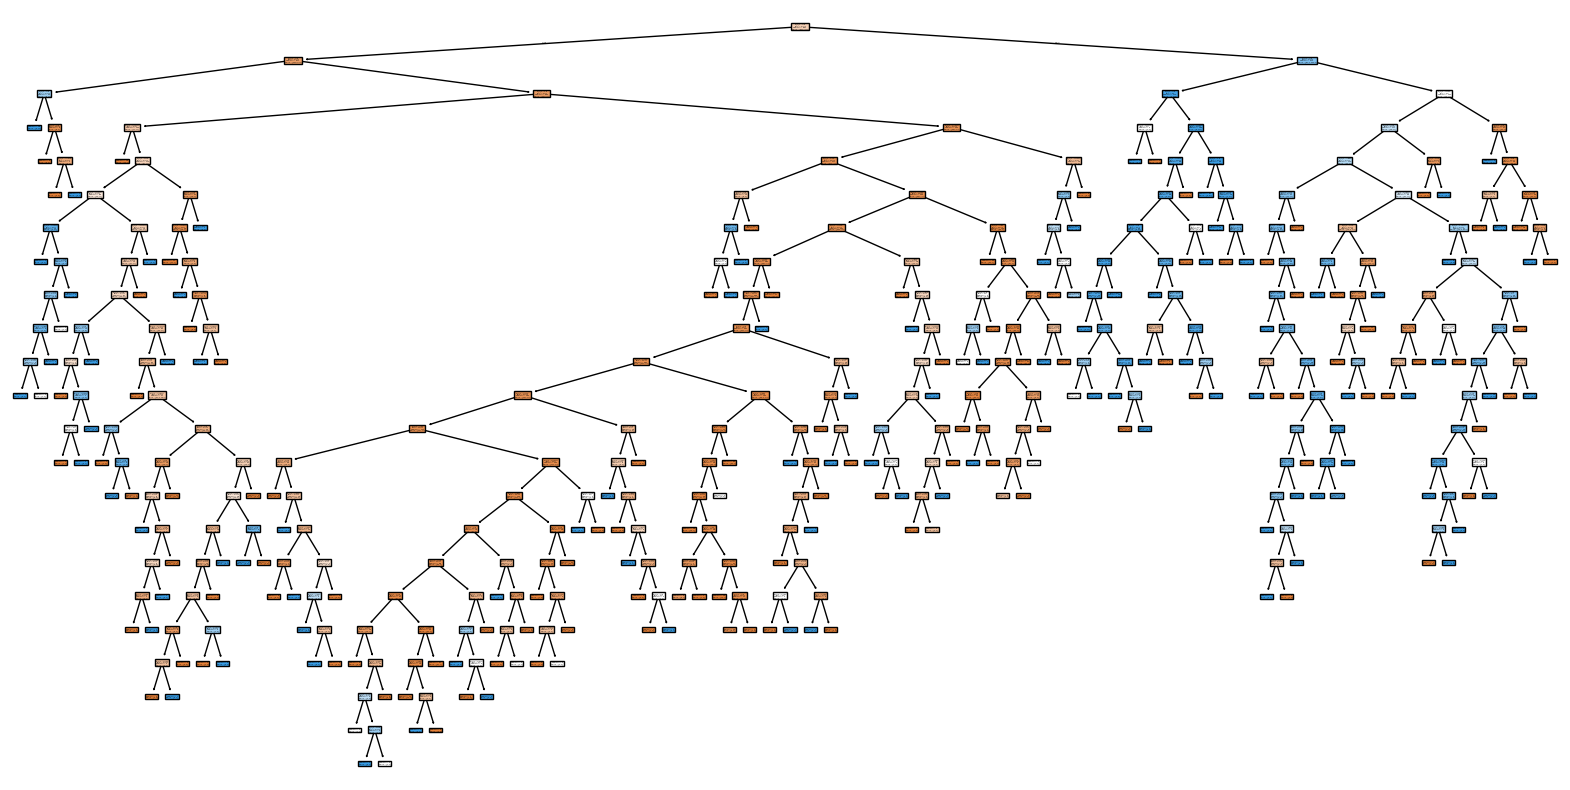

<Figure size 640x480 with 0 Axes>

In [77]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,Y), filled=True)
plt.show()
plt.savefig("decision_tree.pdf",format ="pdf",dpi =300)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy :' , accuracy_score(prediction,expected))

Accuracy : 0.8100558659217877


In [82]:
print('precision :' , precision_score(expected,prediction))
print('f1 :' , f1_score(expected,prediction))
print('recall :' , recall_score(expected,prediction))



precision : 0.7272727272727273
f1 : 0.7384615384615385
recall : 0.75


               Predicted Positive	  Predicted Negative
Actual Positive	:True Positive (TP)	False Negative (FN) /

Actual Negative	:False Positive (FP)	True Negative (TN)

Precision
Definition: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It answers the question: "Of all the instances that were predicted as positive, how many were actually positive?"
Formula:
Precision=𝑇𝑃/𝑇𝑃+𝐹𝑃
Interpretation: High precision indicates a low false positive rate. Precision is useful when the cost of false positives is high.

Recall (Sensitivity or True Positive Rate)
Definition: Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "Of all the instances that were actually positive, how many were correctly predicted as positive?"
 formula 
   recall=𝑇𝑃/𝑇𝑃+𝐹N
Interpretation: High recall indicates a low false negative rate. Recall is useful when the cost of false negatives is high.

F1 Score
Definition: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when you need a single metric to evaluate model performance, and the classes are imbalanced.



finding confusion matrics

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected,prediction)
cm

array([[97, 18],
       [16, 48]], dtype=int64)

plot for confuson  matrics

<Axes: >

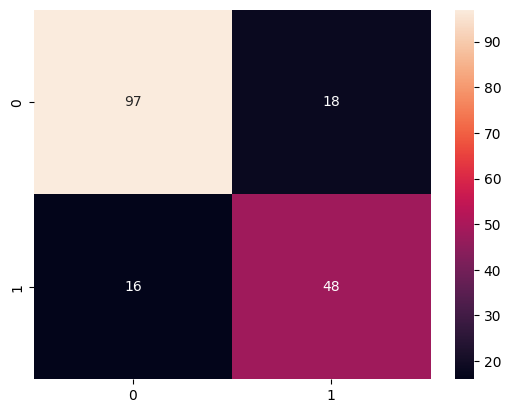

In [84]:
sns.heatmap(cm,annot=True)